<a href="https://colab.research.google.com/github/sskarthik0801/ME-597-IIOT/blob/main/lab/lab2/L2_Colab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="hhttps://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab2/L2_Colab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2.3 Time and frequency domain calculations and analysis using ADXL345 data



For this section of Lab 2, have ready in hand all CSV files (highest rate outcome of 3200 Hz) from each activity: no fan, fan in normal condition, and  fan in anomalous condition.

For this portion of the lab, you will no longer need to use the Raspberry PI as you already have the data collected.

**You will run all your code using this Colab notebook**

## 3.1 Signal Processing and plotting data from: Fan off data

### Reading a CSV file and plotting data

In this part, we will read the saved CSV file generated in Lab 2.2 and then plot the data. A sample code structure is given below. It includes frequency domain transformations as well. However, the plotting part of the FFT signals is incomplete. You should finish the incomplete part.

Please note that you must change the ‘filename’ variable according to the CSV file you saved in the previous part. By modifying and adding lines, try to calculate time domain features from each axis data in Table 1 in the Prelab 2.2, such as mean, standard deviation, root mean square, and so on.






Import essential libraries:

In [1]:
import matplotlib
#matplotlib.use('tkagg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn as sns
import csv

The following code allows you to upload the data stored in a csv file to this Colab notebook.

In [2]:
#This code allows you to upload a file from your local drive
from google.colab import files
uploaded = files.upload()
#If you will work with excel, please save your file with a .CSV format
#Check the output file name below. You will use that file name in the next block.

Saving 20260204_155652_lab2_fan_off.csv to 20260204_155652_lab2_fan_off.csv


The next coding block extracts information from the csv file, and saves it through arrays.
The FFT fourier code is incomplete (a_y, and a_z are not coded). Please finish coding it and plot it by uncommenting the plot code lines.

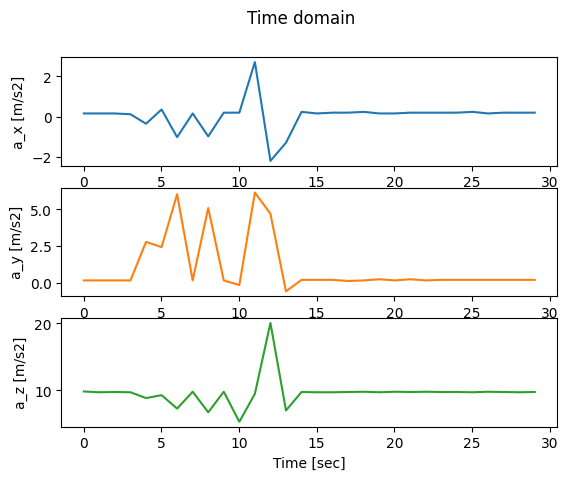

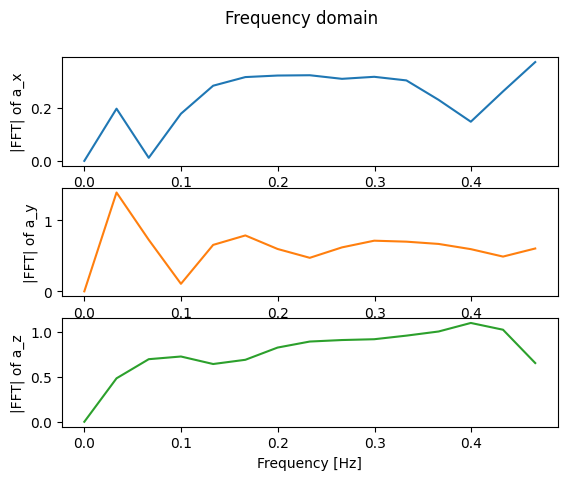

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import csv # Keep csv import as it was originally there, though pandas is preferred for this task

filename1 = '20260204_155652_lab2_fan_off.csv' #Insert the imported csv file name (copy the bolded text from the previous output) from the previous step inside the quotations

# Use pandas to read the CSV for easier data handling and timestamp parsing
df = pd.read_csv(filename1)

# Convert 'Timestamp' column to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Calculate time in seconds relative to the first timestamp
# This will be the 't' array for plotting and calculations
t = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds().to_numpy()

# Extract acceleration data and convert to numpy arrays
a_x = df['a_x [m/s2]'].to_numpy()
a_y = df['a_y [m/s2]'].to_numpy()
a_z = df['a_z [m/s2]'].to_numpy()

# Determine N (Number of samples)
N = len(t)

# Calculate T (average sampling period)
# Assuming uniform sampling rate, T can be derived from the first interval.
# If N is 0 or 1, T would be undefined or 0.
if N > 1:
    T = t[1] - t[0]
else:
    T = 0 # Handle case with less than 2 samples

# The original 'dt' list and its conversion to numpy array are removed
# as 't' (numpy array) now holds the time values and 'T' holds the sampling period.
# The 'n' variable is adjusted to use the length of 't'.
n = np.array(range(N)) + 1 # measured sequence

# --- Original plotting code for time domain ---
fig1, ax1 = plt.subplots(3)
fig1.suptitle('Time domain')
ax1[0].plot(t,a_x,'tab:blue')
ax1[0].set_ylabel('a_x [m/s2]')
ax1[1].plot(t,a_y, 'tab:orange')
ax1[1].set_ylabel('a_y [m/s2]')
ax1[2].plot(t,a_z, 'tab:green')
ax1[2].set_ylabel('a_z [m/s2]')
ax1[2].set_xlabel('Time [sec]')


# get_fft is a function to calculate FFT
# arguments are x(signal array), T(sampling period), N(number of Samples)
# returns are f(frequency array) and y_mag(FFT magnitude array)
def get_fft(x, T, N):
    f = fftfreq(N, T)[:N//2]
    y_mag = 2/N * np.abs(fft(x)[:N//2])
    y_mag[0] = 0
    return f, y_mag


f_x, y_x = get_fft(a_x, T, N)
# Complete FFT for a_y and a_z
f_y, y_y = get_fft(a_y, T, N)
f_z, y_z = get_fft(a_z, T, N)

fig2, ax2 = plt.subplots(3)
fig2.suptitle('Frequency domain')
ax2[0].plot(f_x,y_x,'tab:blue')
ax2[0].set_ylabel('|FFT| of a_x')
# Uncomment and complete plotting for a_y and a_z
ax2[1].plot(f_y,y_y,'tab:orange')
ax2[1].set_ylabel('|FFT| of a_y')
ax2[2].plot(f_z,y_z,'tab:green')
ax2[2].set_ylabel('|FFT| of a_z')
ax2[2].set_xlabel('Frequency [Hz]')

plt.show()


## 3.2 Signal Processing and plotting data from: Fan normal condition data

Reuse the code above to process the data and plot the signal for fan data in normal conditions.

HINT: Do not use the same variables names from code above. You will need all data information stored in different variables for Section 3.4

In [10]:
#Insert the block of code to upload the csv file here:
#
from google.colab import files
uploaded = files.upload()
#

Saving 20260204_163425_lab2_fan_normal.csv to 20260204_163425_lab2_fan_normal.csv


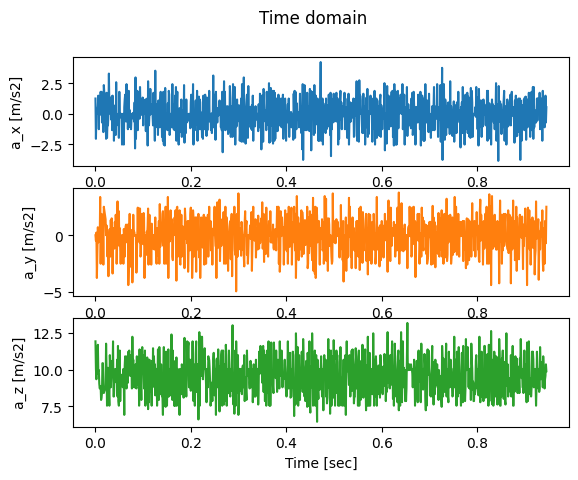

In [17]:
#Insert the block of code for calculating time-domain features:
#Print out all time domain features in this block
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import csv
filename1 = '20260204_163425_lab2_fan_normal.csv' #Insert the imported csv file name (copy the bolded text from the previous output) from the previous step inside the quotations

# Use pandas to read the CSV for easier data handling and timestamp parsing
df = pd.read_csv(filename1)

# The 't [sec]' column already contains time in seconds.
# Calculate time in seconds relative to the first timestamp
# This will be the 't' array for plotting and calculations
t = df['t [sec]'].to_numpy()

# Extract acceleration data and convert to numpy arrays
a_x = df['a_x [m/s2]'].to_numpy()
a_y = df['a_y [m/s2]'].to_numpy()
a_z = df['a_z [m/s2]'].to_numpy()

# Determine N (Number of samples)
N = len(t)

# Calculate T (average sampling period)
# Assuming uniform sampling rate, T can be derived from the first interval.
# If N is 0 or 1, T would be undefined or 0.
if N > 1:
    T = t[1] - t[0]
else:
    T = 0 # Handle case with less than 2 samples

# The original 'dt' list and its conversion to numpy array are removed
# as 't' (numpy array) now holds the time values and 'T' holds the sampling period.
# The 'n' variable is adjusted to use the length of 't'.
n = np.array(range(N)) + 1 # measured sequence
#
# --- Original plotting code for time domain ---
fig1, ax1 = plt.subplots(3)
fig1.suptitle('Time domain')
ax1[0].plot(t,a_x,'tab:blue')
ax1[0].set_ylabel('a_x [m/s2]')
ax1[1].plot(t,a_y, 'tab:orange')
ax1[1].set_ylabel('a_y [m/s2]')
ax1[2].plot(t,a_z, 'tab:green')
ax1[2].set_ylabel('a_z [m/s2]')
ax1[2].set_xlabel('Time [sec]')
plt.show()

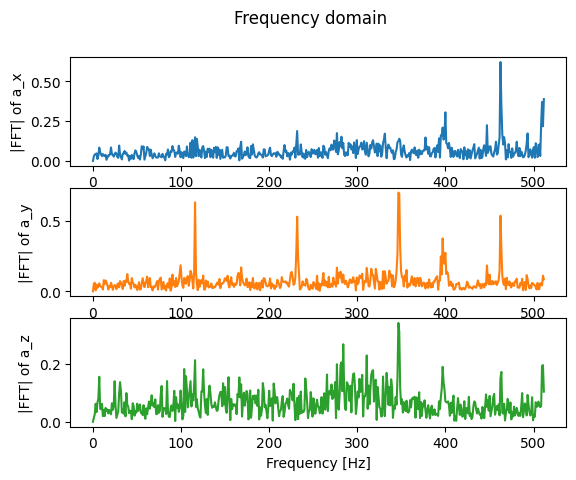

In [18]:
#Insert the block of code for processing and plotting here:
#


# get_fft is a function to calculate FFT
# arguments are x(signal array), T(sampling period), N(number of Samples)
# returns are f(frequency array) and y_mag(FFT magnitude array)
def get_fft(x, T, N):
    f = fftfreq(N, T)[:N//2]
    y_mag = 2/N * np.abs(fft(x)[:N//2])
    y_mag[0] = 0
    return f, y_mag


f_x, y_x = get_fft(a_x, T, N)
# Complete FFT for a_y and a_z
f_y, y_y = get_fft(a_y, T, N)
f_z, y_z = get_fft(a_z, T, N)

fig2, ax2 = plt.subplots(3)
fig2.suptitle('Frequency domain')
ax2[0].plot(f_x,y_x,'tab:blue')
ax2[0].set_ylabel('|FFT| of a_x')
# Uncomment and complete plotting for a_y and a_z
ax2[1].plot(f_y,y_y,'tab:orange')
ax2[1].set_ylabel('|FFT| of a_y')
ax2[2].plot(f_z,y_z,'tab:green')
ax2[2].set_ylabel('|FFT| of a_z')
ax2[2].set_xlabel('Frequency [Hz]')

plt.show()
#

## 3.3 Signal Processing and plotting data from: Fan anomalous condition data

Reuse the code above to process the data and plot the signal for fan data in normal conditions.

HINT: Do not use the same variables names from code above. You will need all data information stored in different variables for Section 3.4

In [19]:
#Insert the block of code to upload the csv file here:
#
from google.colab import files
uploaded = files.upload()
#

Saving 20260204_163053_lab2_fan_abnormal.csv to 20260204_163053_lab2_fan_abnormal.csv


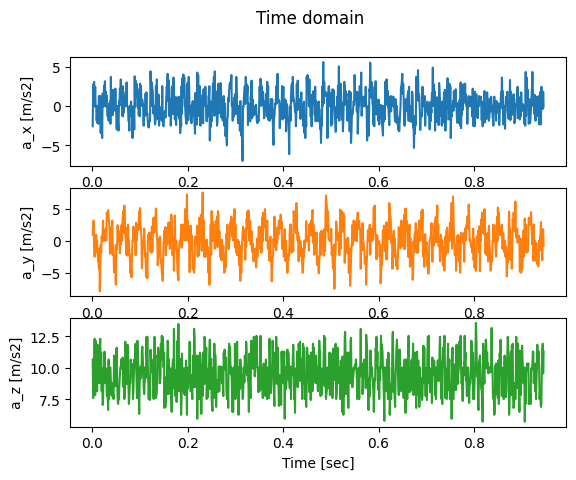

In [20]:
#Insert the block of code for calculating time-domain features:
#Print out all time domain features in this block
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import csv
filename1 = '20260204_163053_lab2_fan_abnormal.csv' #Insert the imported csv file name (copy the bolded text from the previous output) from the previous step inside the quotations

# Use pandas to read the CSV for easier data handling and timestamp parsing
df = pd.read_csv(filename1)

# The 't [sec]' column already contains time in seconds.
# Calculate time in seconds relative to the first timestamp
# This will be the 't' array for plotting and calculations
t = df['t [sec]'].to_numpy()

# Extract acceleration data and convert to numpy arrays
a_x = df['a_x [m/s2]'].to_numpy()
a_y = df['a_y [m/s2]'].to_numpy()
a_z = df['a_z [m/s2]'].to_numpy()

# Determine N (Number of samples)
N = len(t)

# Calculate T (average sampling period)
# Assuming uniform sampling rate, T can be derived from the first interval.
# If N is 0 or 1, T would be undefined or 0.
if N > 1:
    T = t[1] - t[0]
else:
    T = 0 # Handle case with less than 2 samples

# The original 'dt' list and its conversion to numpy array are removed
# as 't' (numpy array) now holds the time values and 'T' holds the sampling period.
# The 'n' variable is adjusted to use the length of 't'.
n = np.array(range(N)) + 1 # measured sequence
#
# --- Original plotting code for time domain ---
fig1, ax1 = plt.subplots(3)
fig1.suptitle('Time domain')
ax1[0].plot(t,a_x,'tab:blue')
ax1[0].set_ylabel('a_x [m/s2]')
ax1[1].plot(t,a_y, 'tab:orange')
ax1[1].set_ylabel('a_y [m/s2]')
ax1[2].plot(t,a_z, 'tab:green')
ax1[2].set_ylabel('a_z [m/s2]')
ax1[2].set_xlabel('Time [sec]')
plt.show()
#

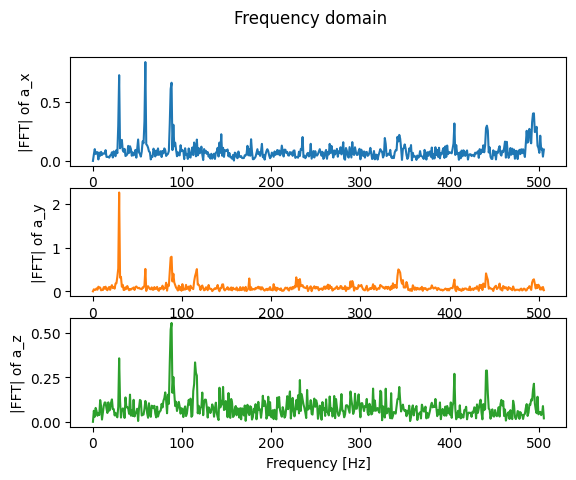

In [21]:
#Insert the block of code for processing and plotting here:
#
# get_fft is a function to calculate FFT
# arguments are x(signal array), T(sampling period), N(number of Samples)
# returns are f(frequency array) and y_mag(FFT magnitude array)
def get_fft(x, T, N):
    f = fftfreq(N, T)[:N//2]
    y_mag = 2/N * np.abs(fft(x)[:N//2])
    y_mag[0] = 0
    return f, y_mag


f_x, y_x = get_fft(a_x, T, N)
# Complete FFT for a_y and a_z
f_y, y_y = get_fft(a_y, T, N)
f_z, y_z = get_fft(a_z, T, N)

fig2, ax2 = plt.subplots(3)
fig2.suptitle('Frequency domain')
ax2[0].plot(f_x,y_x,'tab:blue')
ax2[0].set_ylabel('|FFT| of a_x')
# Uncomment and complete plotting for a_y and a_z
ax2[1].plot(f_y,y_y,'tab:orange')
ax2[1].set_ylabel('|FFT| of a_y')
ax2[2].plot(f_z,y_z,'tab:green')
ax2[2].set_ylabel('|FFT| of a_z')
ax2[2].set_xlabel('Frequency [Hz]')

plt.show()

#

## 3.4 Contrasting time and frequency domain plots between datasets: Normal vs Anomalous

#### TASK 3.4

You will use the data you have worked through this Colab notebook. No need to re-run all codes.
1.	Make a comparative figure between the time-domain graphs on normal and anomalous data.

       * Column 1: Normal data, Column 2: Anomalous data

       * Row 1: a_x, Row 2: a_y, Row 3: a_z

2. Repeat 1. Make a comparative figure between the frequency-domain graphs on normal and anomalous data.
2.	Add your name at the end of the tile of each plot (e.g., ‘Time domain, John Doe’)


In [42]:
filename_normal = '20260204_163425_lab2_fan_normal.csv' # Insert the imported csv file name

# Use pandas to read the CSV for easier data handling and timestamp parsing
df_normal = pd.read_csv(filename_normal)

# Extract time in seconds relative to the first timestamp
t_normal = df_normal['t [sec]'].to_numpy()

# Extract acceleration data and convert to numpy arrays
a_x_normal = df_normal['a_x [m/s2]'].to_numpy()
a_y_normal = df_normal['a_y [m/s2]'].to_numpy()
a_z_normal = df_normal['a_z [m/s2]'].to_numpy()

# Determine N (Number of samples)
N_normal = len(t_normal)

# Calculate T (average sampling period)
# Assuming uniform sampling rate, T can be derived from the first interval.
# If N is 0 or 1, T would be undefined or 0.
if N_normal > 1:
    T_normal = t_normal[1] - t_normal[0]
else:
    T_normal = 0 # Handle case with less than 2 samples

# get_fft is a function to calculate FFT (assuming it's defined in a previous cell)
# arguments are x(signal array), T(sampling period), N(number of Samples)
# returns are f(frequency array) and y_mag(FFT magnitude array)
# def get_fft(x, T, N):
#     f = fftfreq(N, T)[:N//2]
#     y_mag = 2/N * np.abs(fft(x)[:N//2])
#     y_mag[0] = 0
#     return f, y_mag

f_x_normal, y_x_normal = get_fft(a_x_normal, T_normal, N_normal)
f_y_normal, y_y_normal = get_fft(a_y_normal, T_normal, N_normal)
f_z_normal, y_z_normal = get_fft(a_z_normal, T_normal, N_normal)

print("Fan Normal Data Processed:")
print(f"Number of samples (N_normal): {N_normal}")
print(f"Average sampling period (T_normal): {T_normal:.6f} seconds")

filename_anomalous = '20260204_163053_lab2_fan_abnormal.csv' # Insert the imported csv file name

# Use pandas to read the CSV for easier data handling and timestamp parsing
df_anomalous = pd.read_csv(filename_anomalous)

# Extract time in seconds relative to the first timestamp
t_anomalous = df_anomalous['t [sec]'].to_numpy()

# Extract acceleration data and convert to numpy arrays
a_x_anomalous = df_anomalous['a_x [m/s2]'].to_numpy()
a_y_anomalous = df_anomalous['a_y [m/s2]'].to_numpy()
a_z_anomalous = df_anomalous['a_z [m/s2]'].to_numpy()

# Determine N (Number of samples)
N_anomalous = len(t_anomalous)

# Calculate T (average sampling period)
# Assuming uniform sampling rate, T can be derived from the first interval.
# If N is 0 or 1, T would be undefined or 0.
if N_anomalous > 1:
    T_anomalous = t_anomalous[1] - t_anomalous[0]
else:
    T_anomalous = 0 # Handle case with less than 2 samples

# get_fft is a function to calculate FFT (assuming it's defined in a previous cell)
# arguments are x(signal array), T(sampling period), N(number of Samples)
# returns are f(frequency array) and y_mag(FFT magnitude array)
# def get_fft(x, T, N):
#     f = fftfreq(N, T)[:N//2]
#     y_mag = 2/N * np.abs(fft(x)[:N//2])
#     y_mag[0] = 0
#     return f, y_mag

f_x_anomalous, y_x_anomalous = get_fft(a_x_anomalous, T_anomalous, N_anomalous)
f_y_anomalous, y_y_anomalous = get_fft(a_y_anomalous, T_anomalous, N_anomalous)
f_z_anomalous, y_z_anomalous = get_fft(a_z_anomalous, T_anomalous, N_anomalous)

print("Fan Anomalous Data Processed:")
print(f"Number of samples (N_anomalous): {N_anomalous}")
print(f"Average sampling period (T_anomalous): {T_anomalous:.6f} seconds")

Fan Normal Data Processed:
Number of samples (N_normal): 1000
Average sampling period (T_normal): 0.000975 seconds
Fan Anomalous Data Processed:
Number of samples (N_anomalous): 1000
Average sampling period (T_anomalous): 0.000987 seconds


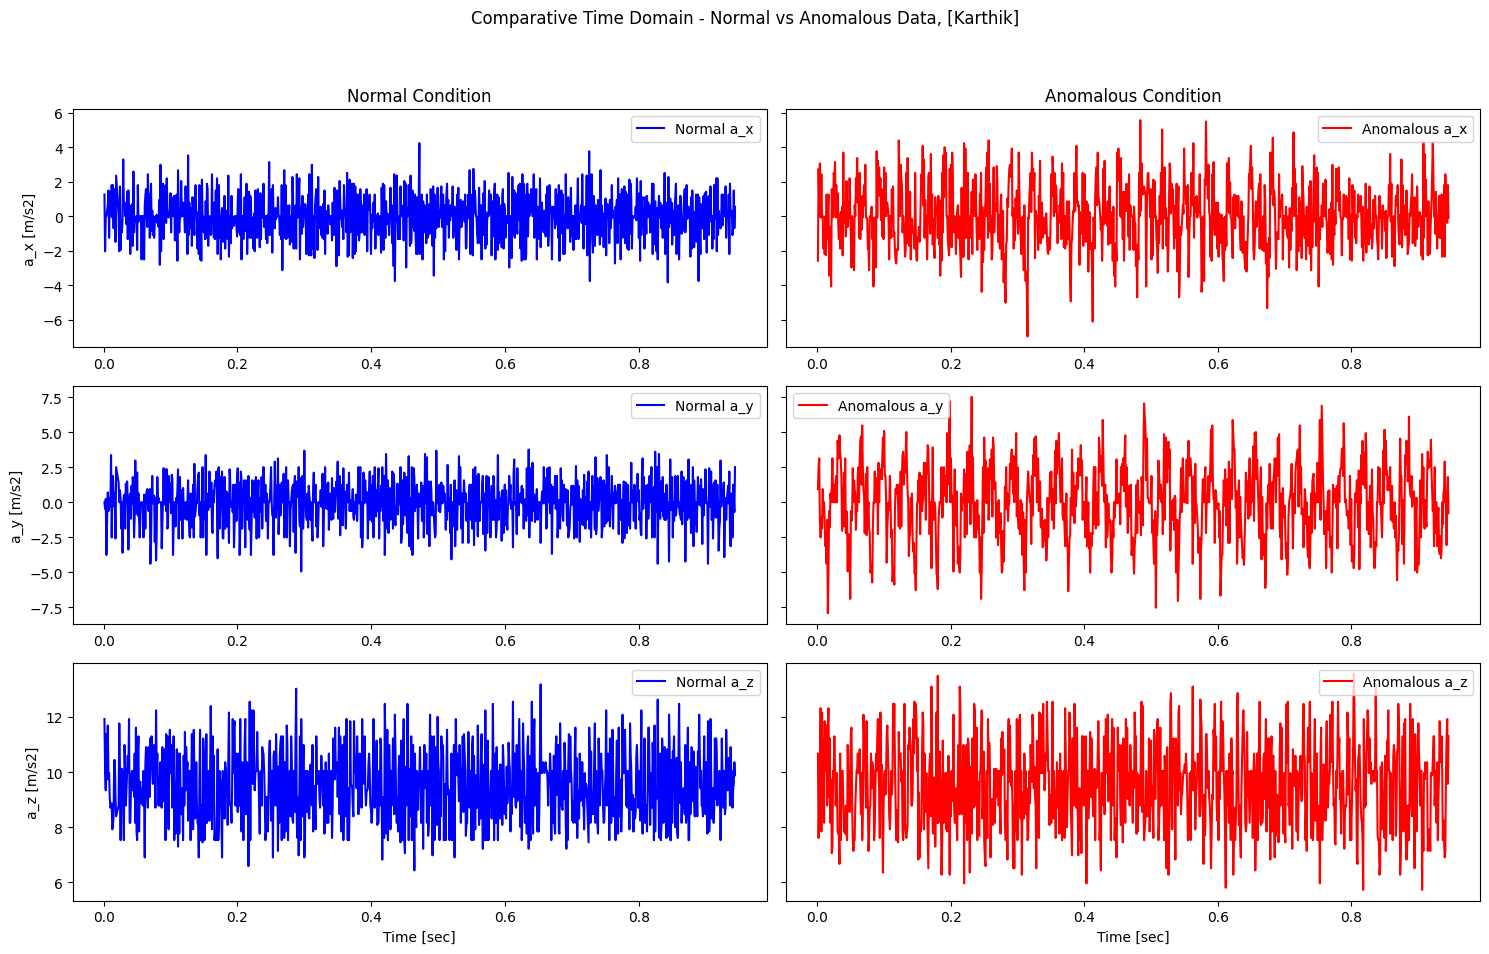

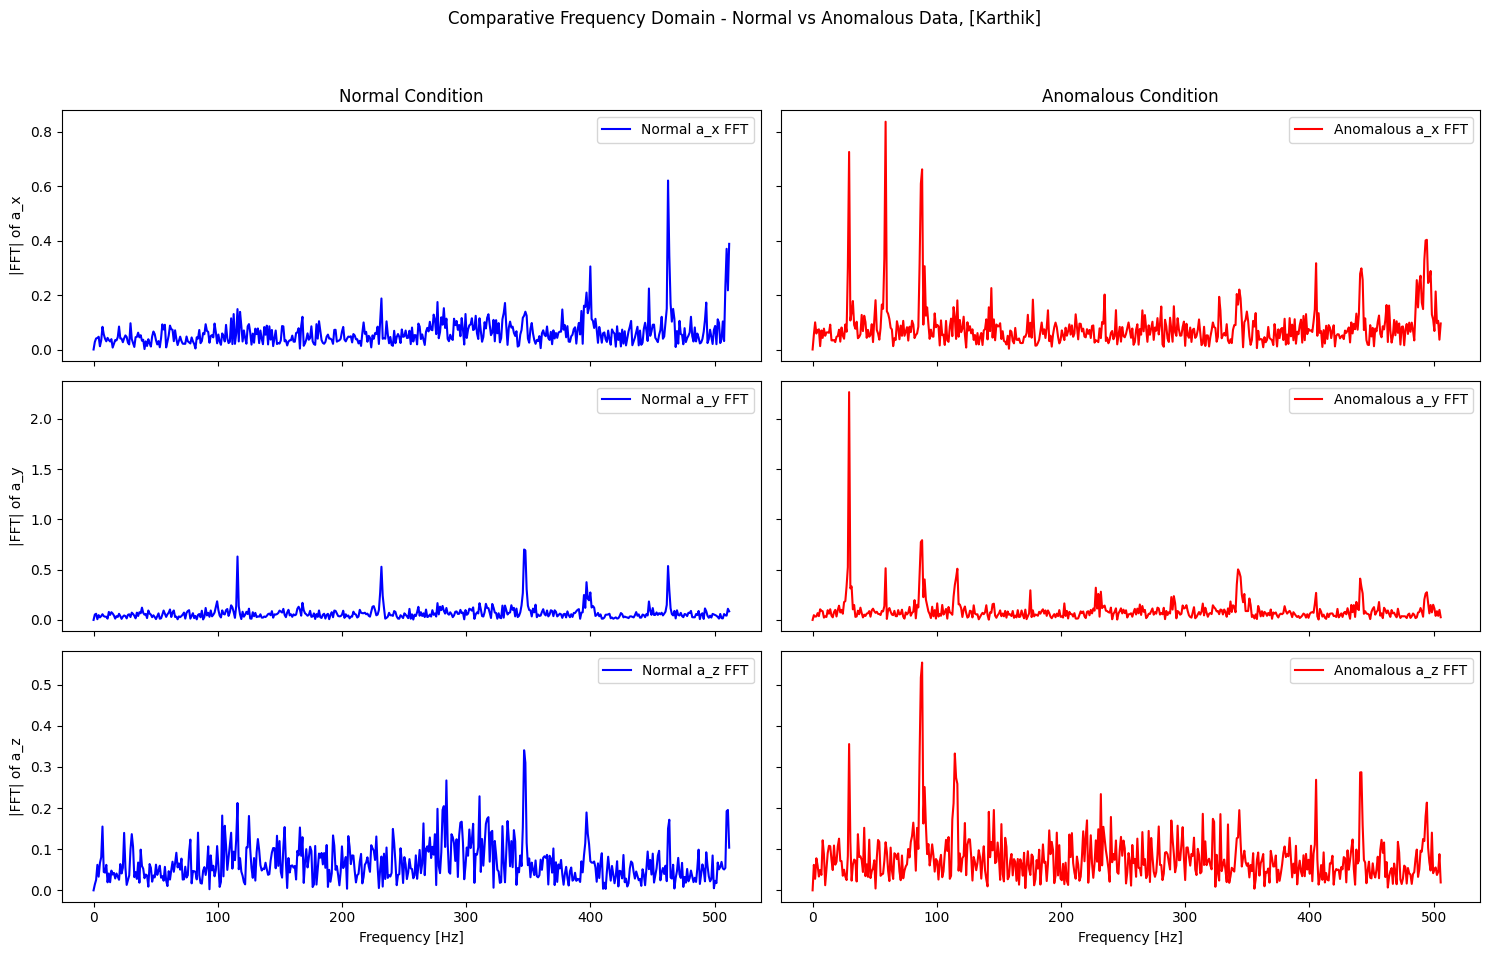

In [44]:
#Insert your code here:
#Provide comments to describe your code
#
my_name = "[Karthik]"

# 1. Comparative Time-Domain Plots
fig_time, axs_time = plt.subplots(3, 2, figsize=(15, 10), sharex=False, sharey='row')
fig_time.suptitle(f'Comparative Time Domain - Normal vs Anomalous Data, {my_name}')

# Row 1: a_x
axs_time[0, 0].plot(t_normal, a_x_normal, label='Normal a_x', color='blue')
axs_time[0, 0].set_ylabel('a_x [m/s2]')
axs_time[0, 0].set_title('Normal Condition')
axs_time[0, 0].legend()

axs_time[0, 1].plot(t_anomalous, a_x_anomalous, label='Anomalous a_x', color='red')
axs_time[0, 1].set_title('Anomalous Condition')
axs_time[0, 1].legend()

# Row 2: a_y
axs_time[1, 0].plot(t_normal, a_y_normal, label='Normal a_y', color='blue')
axs_time[1, 0].set_ylabel('a_y [m/s2]')
axs_time[1, 0].legend()

axs_time[1, 1].plot(t_anomalous, a_y_anomalous, label='Anomalous a_y', color='red')
axs_time[1, 1].legend()

# Row 3: a_z
axs_time[2, 0].plot(t_normal, a_z_normal, label='Normal a_z', color='blue')
axs_time[2, 0].set_xlabel('Time [sec]')
axs_time[2, 0].set_ylabel('a_z [m/s2]')
axs_time[2, 0].legend()

axs_time[2, 1].plot(t_anomalous, a_z_anomalous, label='Anomalous a_z', color='red')
axs_time[2, 1].set_xlabel('Time [sec]')
axs_time[2, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

#Frequency

my_name = "[Karthik]"

# 2. Comparative Frequency-Domain Plots
fig_freq, axs_freq = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey='row')
fig_freq.suptitle(f'Comparative Frequency Domain - Normal vs Anomalous Data, {my_name}')

# Row 1: a_x FFT
axs_freq[0, 0].plot(f_x_normal, y_x_normal, label='Normal a_x FFT', color='blue')
axs_freq[0, 0].set_ylabel('|FFT| of a_x')
axs_freq[0, 0].set_title('Normal Condition')
axs_freq[0, 0].legend()

axs_freq[0, 1].plot(f_x_anomalous, y_x_anomalous, label='Anomalous a_x FFT', color='red')
axs_freq[0, 1].set_title('Anomalous Condition')
axs_freq[0, 1].legend()

# Row 2: a_y FFT
axs_freq[1, 0].plot(f_y_normal, y_y_normal, label='Normal a_y FFT', color='blue')
axs_freq[1, 0].set_ylabel('|FFT| of a_y')
axs_freq[1, 0].legend()

axs_freq[1, 1].plot(f_y_anomalous, y_y_anomalous, label='Anomalous a_y FFT', color='red')
axs_freq[1, 1].legend()

# Row 3: a_z FFT
axs_freq[2, 0].plot(f_z_normal, y_z_normal, label='Normal a_z FFT', color='blue')
axs_freq[2, 0].set_xlabel('Frequency [Hz]')
axs_freq[2, 0].set_ylabel('|FFT| of a_z')
axs_freq[2, 0].legend()

axs_freq[2, 1].plot(f_z_anomalous, y_z_anomalous, label='Anomalous a_z FFT', color='red')
axs_freq[2, 1].set_xlabel('Frequency [Hz]')
axs_freq[2, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

#


### Compare data of two conditions (normal vs. anomalous) of the axial flow fan.
  



#### 1) What contrast could be made between comparing time-domain characteristics of normal vs anomalous condition data?
---
When I compare the y-axis terms, in both normal and anamolous - I see that the range in anamolous is much broader than in normal running case. which means there are higher vibrations for which the range changes.

---

#### 2) What are the main frequencies and FFT magnitudes of each measurement?
---

I think the x axis of acceleration gives us the clear picture of vibrations that happen in the fan.

---

#### 3) Which domain features are better to detect the abnormal condition of the fan? Explain why.
---

I think frequency domain gives us a better picture of what's going wrong in what because it breaks down the time domain and gives us out the magnitdue of frequency which makes it easier to understand where in machine it's going wrong.

---

#### 4) From the three measured dimensions, Which dimension shows the best salient feature in order to detect vibration? Explain why.
---

The y axis of acceleration gives us the clear picture of vibrations that happen in the fan. this is because when compared to x and z axis, the max value is not changing much in normal and anamolous but in case of x axis it's seen that the max value increases from 0.5 to ~2.5



---

## Lab2 Summary and Deliverables

Answer the following questions for your achievements




### Q1. Please summarize Lab2.

---
We recorded some data using accelerometer sensor on the fan and
saved 3 different data in csv, which is then extracted and used for plotting time domain and frequency domain graph using FFT.
---


### Q2. What skills did you have to develop to accomplish this project?

---

I learnt recording data, plotting graphs in comparison and how to do FFT.

---

### Q3. What aspects of this project were the most beneficial for your learning?

---

Comparing and analyzing the data after running it through the FFT code was very resourceful.

---

### Q4. What challenges did you encounter in completing the project?

---

Getting the right output for plot comparison was a challenge, especialyl to maintain the same axis range for both normal and anamolous fan.

---

### Q5. How did you overcome the challenges or remedy the problems encountered?

---

I tried to dynamically adjust the axis but instead maintained it manually.

---